### Importing and preparing the tweets

In [1]:
# importing data set after sentiment analysis
import pickle

pickle_tweets = open(r"C:\Users\Axel\Downloads\df_nltk.pickle", "rb")
example_tweets = pickle.load(pickle_tweets)
example_tweets.head()

,datetime,text,Language,sentiment_textblob,sentiment_nltk
0,2019-01-01 00:00:00,bitcoin unit price market cap hr vol,en,neutral,neutral
1,2019-01-01 00:00:00,learn ses bitcoin lowest average daily price c...,en,negative,negative
3,2019-01-01 00:00:01,iam platform curated retwet via twiter com _al...,en,positive,neutral
4,2019-01-01 00:00:01,bitcoin btc price change h market cap ranking ...,en,neutral,neutral
5,2019-01-01 00:00:01,iam platform curated retwet via twiter com rea...,en,positive,positive


In [2]:
# creating dataframe
import pandas as pd
example_tweets["datetime"] = pd.to_datetime(example_tweets["datetime"])
example_tweets = example_tweets.set_index("datetime")
example_tweets["day"] = example_tweets.index.day

In [3]:
# get counts per day and sentiment
pnn_counts_textblob = example_tweets.groupby(["day", "sentiment_textblob"])["text"].count()
pnn_counts_textblob = pnn_counts_textblob.to_frame()
pnn_counts_textblob = pnn_counts_textblob.reset_index()
pnn_counts_textblob = pnn_counts_textblob.rename(columns= {"text":"textblob_count"})

pnn_counts_nltk = example_tweets.groupby(["day", "sentiment_nltk"])["text"].count()
pnn_counts_nltk = pnn_counts_nltk.to_frame()
pnn_counts_nltk = pnn_counts_nltk.reset_index()
pnn_counts_nltk = pnn_counts_nltk.rename(columns= {"text":"nltk_count"})

In [4]:
# merge counts to dataframe
textblob_count = pnn_counts_textblob["textblob_count"].tolist()
pnn_counts_nltk["textblob_count"] = textblob_count
pnn_counts_nltk

pnn_counts = pnn_counts_nltk
pnn_counts = pnn_counts.rename(columns= {"NLTK_Sentiment":"sentiment"})
pnn_counts.head(9)

,day,sentiment_nltk,nltk_count,textblob_count
0,1,negative,2270,1810
1,1,neutral,8114,9773
2,1,positive,7618,6419
3,2,negative,3637,2733
4,2,neutral,8885,12052
5,2,positive,9409,7146
6,3,negative,4473,2673
7,3,neutral,10802,15137
8,3,positive,12174,9639


In [5]:
indexNames = pnn_counts[pnn_counts['sentiment_nltk'] == 'neutral' ].index
 
# Delete these row indexes from dataFrame
pnn_counts.drop(indexNames , inplace=True)

In [6]:
# get only positives and negatives from nltk
pnn_pos_nltk = pnn_counts[pnn_counts['sentiment_nltk'] == 'positive']
pnn_neg_nltk = pnn_counts[pnn_counts['sentiment_nltk'] == 'negative']

In [7]:
# drop textblob and rename columns
pnn_pos_nltk = pnn_pos_nltk.drop(['textblob_count', 'sentiment_nltk'], axis=1)
pnn_neg_nltk = pnn_neg_nltk.drop(['textblob_count', 'sentiment_nltk'], axis=1)
pnn_pos_nltk = pnn_pos_nltk.rename(columns={'nltk_count':'positive'})
pnn_neg_nltk = pnn_neg_nltk.rename(columns={'nltk_count':'negative'})

In [8]:
# get only positives and negatives from textblob
pnn_pos_txtb = pnn_counts[pnn_counts['sentiment_nltk'] == 'positive']
pnn_neg_txtb = pnn_counts[pnn_counts['sentiment_nltk'] == 'negative']

In [9]:
# drop nltk and rename columns
pnn_pos_txtb = pnn_pos_txtb.drop(['nltk_count', 'sentiment_nltk'], axis=1)
pnn_neg_txtb = pnn_neg_txtb.drop(['nltk_count', 'sentiment_nltk'], axis=1)
pnn_pos_txtb = pnn_pos_txtb.rename(columns={'textblob_count':'positive'})
pnn_neg_txtb = pnn_neg_txtb.rename(columns={'textblob_count':'negative'})

In [10]:
# merge positives and negatives for both
pnn_nltk = pnn_pos_nltk.merge(pnn_neg_nltk, on='day')
pnn_txtb = pnn_pos_txtb.merge(pnn_neg_txtb, on='day')

In [11]:
# get overall sentiment count
pnn_nltk['Overall'] = pnn_nltk["positive"] - pnn_nltk["negative"]
pnn_txtb['Overall'] = pnn_txtb["positive"] - pnn_txtb["negative"]

In [12]:
# get % change per day
pnn_nltk['Sentiment'] = pnn_nltk['Overall'].copy()
pnn_nltk['Sentiment'] = pnn_nltk['Overall'].pct_change()
pnn_nltk['Sentiment'] = pnn_nltk['Sentiment'].fillna(0)

pnn_txtb['Sentiment'] = pnn_txtb['Overall'].copy()
pnn_txtb['Sentiment'] = pnn_txtb['Sentiment'].pct_change()
pnn_txtb['Sentiment'] = pnn_txtb['Sentiment'].fillna(0)

In [13]:
pnn_nltk.head()

,day,positive,negative,Overall,Sentiment
0,1,7618,2270,5348,0.000000
1,2,9409,3637,5772,0.079282
2,3,12174,4473,7701,0.334200
3,4,10298,3263,7035,-0.086482
4,5,8335,2595,5740,-0.184080


### Importing and preparing bitcoin dataset

In [14]:
# import data
bit = pd.read_csv(r'C:\Users\Axel\Downloads\BTC_USD_2018-12-31_2019-01-31-CoinDesk.csv')

In [15]:
# get datetime
bit['Date'] = pd.to_datetime(bit['Date'])

In [16]:
# get % change per day
bit = bit.drop(0)
bit['Closing Price (USD) %'] = bit['Closing Price (USD)'].pct_change()
#bit['Closing Price (USD)'] = np.log(bit['Closing Price (USD)'])
bit['Closing Price (USD) %'] = bit['Closing Price (USD) %'].fillna(0)
bit.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Closing Price (USD) %
1,BTC,2019-01-01 22:59:58+00:00,3715.564441,3693.330067,3741.881855,3644.876282,0.000000
2,BTC,2019-01-02 22:59:59+00:00,3882.304754,3715.564384,3900.709127,3711.274108,0.044876
3,BTC,2019-01-03 23:00:00+00:00,3795.592741,3882.303622,3916.197684,3760.944042,-0.022335
4,BTC,2019-01-04 22:59:59+00:00,3812.381108,3781.020706,3844.986111,3725.739663,0.004423
5,BTC,2019-01-05 23:00:00+00:00,3809.914343,3812.381119,3866.417432,3775.828878,-0.000647


In [17]:
# rename column
bit['Closing Price BTC'] = bit['Closing Price (USD) %']

### Importing and preparing unprocessed tweet set for overall tweetcount

In [18]:
# import dataset
tweets = pd.read_csv(r'C:\Users\Axel\Downloads\tweets_df.csv', sep='\t')

In [19]:
tweets.head()

,Unnamed: 0,Date,Tweet,Language
0,0,2019-01-01 00:00:00,Bitcoin with unit price of market cap of ...,en
1,1,2019-01-01 00:00:00,Learn it Ses Bitcoin s Lowest Average Daily P...,en
2,2,2019-01-01 00:00:01,BTC : : ETH : : IXT : : bitcoin ethereum ixt...,en
3,3,2019-01-01 00:00:01,IAM Platform Curated Retwet: Via: twitercomalt...,en
4,4,2019-01-01 00:00:01,Bitcoin BTC Price: Change in h: Market cap: ...,en


In [20]:
# get datetime
tweets['Date'] = pd.to_datetime(tweets['Date'])

In [21]:
# group by day
tweets = tweets.groupby([pd.Grouper(key='Date',freq='d')]).size().reset_index(name='Tweet Count')

In [22]:
# get % change by day
tweets['Tweet Count %'] = tweets['Tweet Count'].copy()
tweets['Tweet Count %'] = tweets['Tweet Count'].pct_change()
tweets['Tweet Count %'] = tweets['Tweet Count %'].fillna(0)

In [23]:
tweets.head()

,Date,Tweet Count,Tweet Count %
0,2019-01-01,20599,0.000000
1,2019-01-02,25312,0.228798
2,2019-01-03,31697,0.252252
3,2019-01-04,26647,-0.159321
4,2019-01-05,21415,-0.196345


### Import and prepare IMdb data

In [58]:
# importing data set after sentiment analysis
import pickle

pickle_tweets = open(r"C:\Users\Axel\Downloads\df_sentiment_imdb_sample.pickle", "rb")
imdb = pickle.load(pickle_tweets)
imdb.head()

,datetime,text,Language,sentiment_textblob,sentiment_nltk,sentiment_imdb_classifiers
633807,2019-01-25 23:00:41,wal stret davos want blockchain bitcoin crypto...,en,neutral,positive,neg
483583,2019-01-20 02:54:11,walmart liquorstores al florida al city get le...,en,negative,neutral,pos
713253,2019-01-29 11:15:01,chicago fast becoming bitcoin atm hot spot new...,en,positive,neutral,neg
486363,2019-01-20 07:00:44,buy btc usd bitcoin us dolar h time frame cure...,en,neutral,neutral,neg
128062,2019-01-06 00:14:53,al bitcoin,en,neutral,neutral,neg


In [59]:
# creating dataframe
import pandas as pd
imdb["datetime"] = pd.to_datetime(imdb["datetime"])
imdb = imdb.set_index("datetime")
imdb["day"] = imdb.index.day

In [60]:
# get counts per day and sentiment
pnn_counts_imdb = imdb.groupby(["day", "sentiment_imdb_classifiers"])["text"].count()
pnn_counts_imdb = pnn_counts_imdb.to_frame()
pnn_counts_imdb = pnn_counts_imdb.reset_index()
pnn_counts_imdb = pnn_counts_imdb.rename(columns= {"text":"imdb_count"})

In [65]:
indexNames = pnn_counts_imdb[pnn_counts_imdb['sentiment_imdb_classifiers'] == 'neutral' ].index
 
# Delete these row indexes from dataFrame
pnn_counts_imdb.drop(indexNames, inplace=True)

In [66]:
# get only positives and negatives from imdb
pnn_pos_imdb = pnn_counts_imdb[pnn_counts_imdb['sentiment_imdb_classifiers'] == 'pos']
pnn_neg_imdb = pnn_counts_imdb[pnn_counts_imdb['sentiment_imdb_classifiers'] == 'neg']

In [70]:
pnn_pos_imdb = pnn_pos_imdb.rename(columns={'imdb_count':'positive'})
pnn_neg_imdb = pnn_neg_imdb.rename(columns={'imdb_count':'negative'})

In [71]:
# merge positives and negatives for both
pnn_imdb = pnn_pos_imdb.merge(pnn_neg_imdb, on='day')

In [72]:
# get overall sentiment count
pnn_imdb['Overall'] = pnn_imdb["positive"] - pnn_imdb["negative"]

In [73]:
# get % change per day
pnn_imdb['Sentiment'] = pnn_imdb['Overall'].copy()
pnn_imdb['Sentiment'] = pnn_imdb['Overall'].pct_change()
pnn_imdb['Sentiment'] = pnn_imdb['Sentiment'].fillna(0)

In [74]:
pnn_imdb.head()

,day,sentiment_imdb_classifiers_x,positive,sentiment_imdb_classifiers_y,negative,Overall,Sentiment
0,1,pos,221,neg,1108,-887,0.000000
1,2,pos,251,neg,1241,-990,0.116122
2,3,pos,298,neg,1585,-1287,0.300000
3,4,pos,227,neg,1355,-1128,-0.123543
4,5,pos,203,neg,1135,-932,-0.173759


### Import and prepare own sentiment classifier data

In [77]:
# importing data set after sentiment analysis
import pickle

pickle_tweets = open(r"C:\Users\Axel\Downloads\df_sentiment_own_sample.pickle", "rb")
own = pickle.load(pickle_tweets)
own.head()

,datetime,text,Language,sentiment_textblob,sentiment_nltk,sentiment_own_classifiers
574425,2019-01-23 17:42:10,dow jones bitcoin fight back record gains mone...,en,neutral,negative,pos
323539,2019-01-13 17:26:33,क टक going years bank acount long bitcoin shor...,en,negative,neutral,neg
728758,2019-01-30 00:09:51,_ days mayer multiple _ market dominance _ has...,en,neutral,positive,neg
189174,2019-01-08 11:08:49,bitcoin price watch btc dips remain suported c...,en,neutral,neutral,pos
296241,2019-01-12 11:00:02,mercadobitcoin btc r blockchain btc r mercadob...,en,neutral,neutral,pos


In [78]:
# creating dataframe
import pandas as pd
own["datetime"] = pd.to_datetime(own["datetime"])
own = own.set_index("datetime")
own["day"] = own.index.day

In [80]:
# get counts per day and sentiment
pnn_counts_own = own.groupby(["day", "sentiment_own_classifiers"])["text"].count()
pnn_counts_own = pnn_counts_own.to_frame()
pnn_counts_own = pnn_counts_own.reset_index()
pnn_counts_own = pnn_counts_own.rename(columns= {"text":"own_count"})

In [81]:
indexNames = pnn_counts_own[pnn_counts_own['sentiment_own_classifiers'] == 'neutral' ].index
 
# Delete these row indexes from dataFrame
pnn_counts_own.drop(indexNames, inplace=True)

In [82]:
# get only positives and negatives from own
pnn_pos_own = pnn_counts_own[pnn_counts_own['sentiment_own_classifiers'] == 'pos']
pnn_neg_own = pnn_counts_own[pnn_counts_own['sentiment_own_classifiers'] == 'neg']

In [83]:
pnn_pos_own = pnn_pos_own.rename(columns={'own_count':'positive'})
pnn_neg_own = pnn_neg_own.rename(columns={'own_count':'negative'})

In [85]:
# merge positives and negatives for both
pnn_own = pnn_pos_own.merge(pnn_neg_own, on='day')

In [86]:
# get overall sentiment count
pnn_own['Overall'] = pnn_own["positive"] - pnn_own["negative"]

In [87]:
# get % change per day
pnn_own['Sentiment'] = pnn_own['Overall'].copy()
pnn_own['Sentiment'] = pnn_own['Overall'].pct_change()
pnn_own['Sentiment'] = pnn_own['Sentiment'].fillna(0)

In [88]:
pnn_own.head()

,day,sentiment_own_classifiers_x,positive,sentiment_own_classifiers_y,negative,Overall,Sentiment
0,1,pos,587,neg,571,16,0.000000
1,2,pos,680,neg,713,-33,-3.062500
2,3,pos,866,neg,881,-15,-0.545455
3,4,pos,694,neg,736,-42,1.800000
4,5,pos,592,neg,617,-25,-0.404762


### Visualization of Total Tweet Count and Bitcoin Price Development (in % change)

In [24]:
# import packages
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

C:\Users\Axel\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


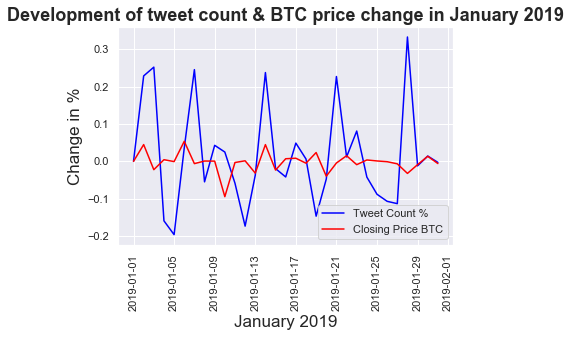

In [25]:
# define data to plot
x = tweets['Date']
y = tweets['Tweet Count %']
z = bit['Closing Price BTC']

plt.plot(x, y, color="blue")
plt.plot(x, z, color="red")
plt.xlabel("January 2019", fontsize=17)
plt.ylabel("Change in %", fontsize=17)
plt.title("Development of tweet count & BTC price change in January 2019", fontsize=18, fontweight="bold")
plt.xticks(rotation=90)
plt.legend(loc='lower right')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.show()

### Visualization of Sentiment (nltk) and Bitcoin Price Development (in % change)

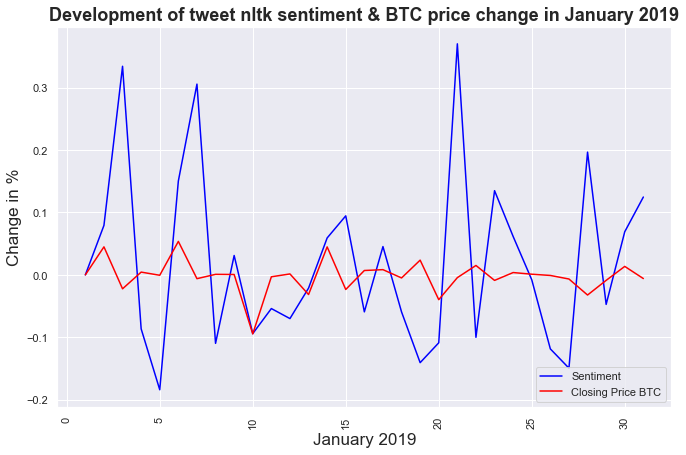

In [95]:
# define data to plot
x = pnn_nltk['day']
y = pnn_nltk['Sentiment']
z = bit['Closing Price BTC']

plt.plot(x, y, color="blue")
plt.plot(x, z, color="red")
plt.xlabel("January 2019", fontsize=17)
plt.ylabel("Change in %", fontsize=17)
plt.title("Development of tweet nltk sentiment & BTC price change in January 2019", fontsize=18, fontweight="bold")
plt.xticks(rotation=90)
plt.legend(loc='lower right')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.show()

### Visualization of Sentiment (textblob) and Bitcoin Price Development (in % change)

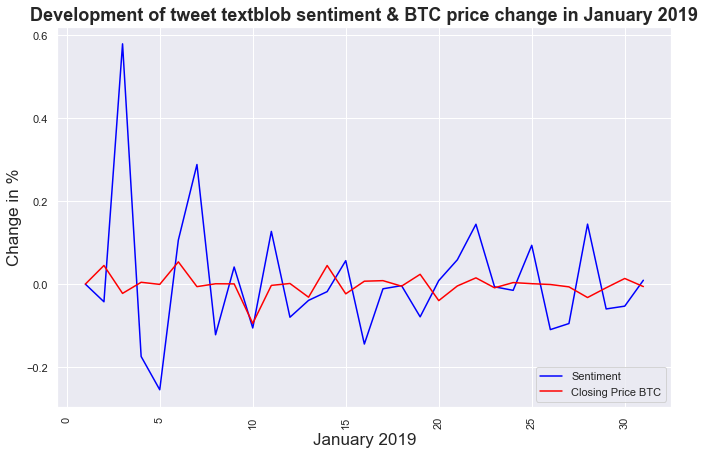

In [96]:
# define data to plot
x = pnn_txtb['day']
y = pnn_txtb['Sentiment']
z = bit['Closing Price BTC']

plt.plot(x, y, color="blue")
plt.plot(x, z, color="red")
plt.xlabel("January 2019", fontsize=17)
plt.ylabel("Change in %", fontsize=17)
plt.title("Development of tweet textblob sentiment & BTC price change in January 2019", fontsize=18, fontweight="bold")
plt.xticks(rotation=90)
plt.legend(loc='lower right')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.show()

### Visualization of Sentiment (imdb) and Bitcoin Price Development (in % change)

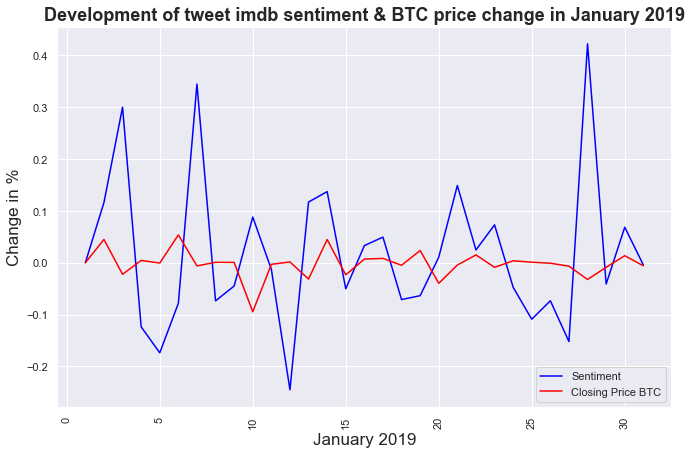

In [98]:
# define data to plot
x = pnn_imdb['day']
y = pnn_imdb['Sentiment']
z = bit['Closing Price BTC']

plt.plot(x, y, color="blue")
plt.plot(x, z, color="red")
plt.xlabel("January 2019", fontsize=17)
plt.ylabel("Change in %", fontsize=17)
plt.title("Development of tweet imdb sentiment & BTC price change in January 2019", fontsize=18, fontweight="bold")
plt.xticks(rotation=90)
plt.legend(loc='lower right')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.show()

### Visualization of Sentiment (own) and Bitcoin Price Development (in % change)

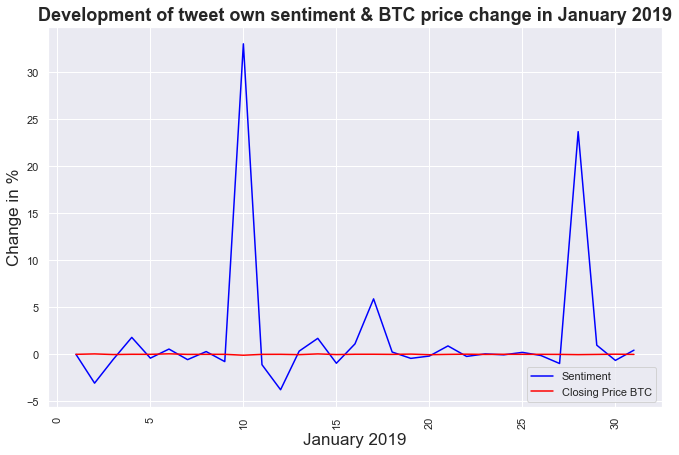

In [97]:
# define data to plot
x = pnn_own['day']
y = pnn_own['Sentiment']
z = bit['Closing Price BTC']

plt.plot(x, y, color="blue")
plt.plot(x, z, color="red")
plt.xlabel("January 2019", fontsize=17)
plt.ylabel("Change in %", fontsize=17)
plt.title("Development of tweet own sentiment & BTC price change in January 2019", fontsize=18, fontweight="bold")
plt.xticks(rotation=90)
plt.legend(loc='lower right')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.show()

### Evaluating Correlations and absolute mean error of the price and tweet curves and shifted curves (avoid possible time effects)

#### Shifting Price Curve

In [40]:
# correlation coefficient of tweet count and bitcoin price change curves when shifting bitcoin towards count curve

from sklearn.metrics import mean_absolute_error
import numpy as np

a = bit['Closing Price BTC']
b = tweets['Tweet Count %']
# correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_bit_count.insert(0, 0)
list_bit_count = list_bit_count[:-1]
list_bit_count = list_bit_count[1:]
list_sent_count = list_sent_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0,1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_bit_count.insert(0, 0)
list_bit_count1 = list_bit_count[:-1]
list_bit_count1 = list_bit_count1[1:]
list_sent_count1 = list_sent_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of total tweet count and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of total tweet count and bitcoin price development
Initial: 
Correlation:  0.022842356182603045 Mean absolute error:  0.09877299405274896
After shifting one day:
Correlation:  0.15761084039580525 Mean absolute error:  0.10218165114820647
After shifting two days:
Correlation:  0.11150726790117463 Mean absolute error:  0.102119133066169


In [41]:
# correlation coefficient of nltk sentiment and bitcoin price change curves when shifting bitcoin towards sentiment curve

import numpy as np
a = bit['Closing Price BTC']
b = pnn_nltk['Sentiment']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_bit_count.insert(0, 0)
list_bit_count = list_bit_count[:-1]
list_bit_count = list_bit_count[1:]
list_sent_count = list_sent_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_bit_count.insert(0, 0)
list_bit_count1 = list_bit_count[:-1]
list_bit_count1 = list_bit_count1[1:]
list_sent_count1 = list_sent_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation and mean absolute error of nltk sentiment and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation and mean absolute error of nltk sentiment and bitcoin price development
Initial: 
Correlation:  0.05206660217093389 Mean absolute error:  0.10598656205850111
After shifting one day:
Correlation:  0.2595784233719069 Mean absolute error:  0.11054877062901808
After shifting two days:
Correlation:  0.038387227093739464 Mean absolute error:  0.1202712502339969


In [42]:
# correlation coefficient of textblob sentiment and bitcoin price change curves when shifting bitcoin towards sentiment curve

import numpy as np
a = bit['Closing Price BTC']
b = pnn_txtb['Sentiment']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_bit_count.insert(0, 0)
list_bit_count = list_bit_count[:-1]
list_bit_count = list_bit_count[1:]
list_sent_count = list_sent_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_bit_count.insert(0, 0)
list_bit_count1 = list_bit_count[:-1]
list_bit_count1 = list_bit_count1[1:]
list_sent_count1 = list_sent_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of textblob sentiment and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of textblob sentiment and bitcoin price development
Initial: 
Correlation:  -0.06445122288431968 Mean absolute error:  0.10122423365109666
After shifting one day:
Correlation:  0.32220303294793023 Mean absolute error:  0.09967836700899027
After shifting two days:
Correlation:  -0.10647353413304386 Mean absolute error:  0.10849431284621183


In [91]:
# correlation coefficient of imdb sentiment and bitcoin price change curves when shifting bitcoin towards sentiment curve

import numpy as np
a = bit['Closing Price BTC']
b = pnn_imdb['Sentiment']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_bit_count.insert(0, 0)
list_bit_count = list_bit_count[:-1]
list_bit_count = list_bit_count[1:]
list_sent_count = list_sent_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_bit_count.insert(0, 0)
list_bit_count1 = list_bit_count[:-1]
list_bit_count1 = list_bit_count1[1:]
list_sent_count1 = list_sent_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of imdb sentiment and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of imdb sentiment and bitcoin price development
Initial: 
Correlation:  -0.21495057966726597 Mean absolute error:  0.11101835875483529
After shifting one day:
Correlation:  0.2012167577798337 Mean absolute error:  0.1119460218255921
After shifting two days:
Correlation:  0.1627465369992936 Mean absolute error:  0.1107659691080787


In [92]:
# correlation coefficient of own sentiment and bitcoin price change curves when shifting bitcoin towards sentiment curve

import numpy as np
a = bit['Closing Price BTC']
b = pnn_own['Sentiment']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_bit_count.insert(0, 0)
list_bit_count = list_bit_count[:-1]
list_bit_count = list_bit_count[1:]
list_sent_count = list_sent_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_bit_count.insert(0, 0)
list_bit_count1 = list_bit_count[:-1]
list_bit_count1 = list_bit_count1[1:]
list_sent_count1 = list_sent_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of own sentiment and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of own sentiment and bitcoin price development
Initial: 
Correlation:  -0.6269235048231776 Mean absolute error:  2.7430655240138067
After shifting one day:
Correlation:  -0.021641433329691817 Mean absolute error:  2.837472947891087
After shifting two days:
Correlation:  0.10555026022562664 Mean absolute error:  2.8128762600036894


#### Shifting Sentiment Curve

In [43]:
# correlation coefficient of tweet count and bitcoin price change curves when shifting count curve towards bitcoin price

import numpy as np
a = bit['Closing Price BTC']
b = tweets['Tweet Count %']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_sent_count.insert(0, 0)
list_sent_count = list_sent_count[:-1]
list_sent_count = list_sent_count[1:]
list_bit_count = list_bit_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_sent_count.insert(0, 0)
list_sent_count1 = list_sent_count[:-1]
list_sent_count1 = list_sent_count1[1:]
list_bit_count1 = list_bit_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of total tweet count and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of total tweet count and bitcoin price development
Initial: 
Correlation:  0.022842356182603045 Mean absolute error:  0.09877299405274896
After shifting one day:
Correlation:  -0.08102245850521972 Mean absolute error:  0.11041688207336119
After shifting two days:
Correlation:  0.05708694272623308 Mean absolute error:  0.10600636412799427


In [44]:
# correlation coefficient of nltk sentiment and bitcoin price change curves when shifting sentiment towards bitcoin curve

import numpy as np
a = bit['Closing Price BTC']
b = pnn_nltk['Sentiment']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_sent_count.insert(0, 0)
list_sent_count = list_sent_count[:-1]
list_sent_count = list_sent_count[1:]
list_bit_count = list_bit_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_sent_count.insert(0, 0)
list_sent_count1 = list_sent_count[:-1]
list_sent_count1 = list_sent_count1[1:]
list_bit_count1 = list_bit_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of nltk sentiment and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of nltk sentiment and bitcoin price development
Initial: 
Correlation:  0.05206660217093389 Mean absolute error:  0.10598656205850111
After shifting one day:
Correlation:  0.01779484447838582 Mean absolute error:  0.11798945682882374
After shifting two days:
Correlation:  0.1522934759147293 Mean absolute error:  0.1074104623700563


In [45]:
# correlation coefficient of textblob sentiment and bitcoin price change curves when shifting sentiment towards bitcoin curve

import numpy as np
a = bit['Closing Price BTC']
b = pnn_txtb['Sentiment']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_sent_count.insert(0, 0)
list_sent_count = list_sent_count[:-1]
list_sent_count = list_sent_count[1:]
list_bit_count = list_bit_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_sent_count.insert(0, 0)
list_sent_count1 = list_sent_count[:-1]
list_sent_count1 = list_sent_count1[1:]
list_bit_count1 = list_bit_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of textblob sentiment and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of textblob sentiment and bitcoin price development
Initial: 
Correlation:  -0.06445122288431968 Mean absolute error:  0.10122423365109666
After shifting one day:
Correlation:  -0.06845378239159951 Mean absolute error:  0.10626571789522825
After shifting two days:
Correlation:  0.04464791408157779 Mean absolute error:  0.10471452090415044


In [93]:
# correlation coefficient of imdb sentiment and bitcoin price change curves when shifting sentiment towards bitcoin curve

import numpy as np
a = bit['Closing Price BTC']
b = pnn_imdb['Sentiment']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_sent_count.insert(0, 0)
list_sent_count = list_sent_count[:-1]
list_sent_count = list_sent_count[1:]
list_bit_count = list_bit_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_sent_count.insert(0, 0)
list_sent_count1 = list_sent_count[:-1]
list_sent_count1 = list_sent_count1[1:]
list_bit_count1 = list_bit_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of imdb sentiment and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of imdb sentiment and bitcoin price development
Initial: 
Correlation:  -0.21495057966726597 Mean absolute error:  0.11101835875483529
After shifting one day:
Correlation:  0.07474925576356485 Mean absolute error:  0.1110074158855787
After shifting two days:
Correlation:  0.04424565465996556 Mean absolute error:  0.1095271355169045


In [94]:
# correlation coefficient of own sentiment and bitcoin price change curves when shifting sentiment towards bitcoin curve

import numpy as np
a = bit['Closing Price BTC']
b = pnn_own['Sentiment']
# Correlation
corr_count = np.corrcoef(a, b)[0, 1]
# mean absolute error
mae_count = mean_absolute_error(a, b)

# creating list and shifting by one day 
list_bit_count = list(a)
list_sent_count = list(b)
list_sent_count.insert(0, 0)
list_sent_count = list_sent_count[:-1]
list_sent_count = list_sent_count[1:]
list_bit_count = list_bit_count[1:]

# correlation after shifting one day
corr_count_1 = np.corrcoef(list_bit_count, list_sent_count)[0, 1]
# mean absolute error after shifting one day
mae_count_1 = mean_absolute_error(list_bit_count, list_sent_count)

# shifting one more day
list_sent_count.insert(0, 0)
list_sent_count1 = list_sent_count[:-1]
list_sent_count1 = list_sent_count1[1:]
list_bit_count1 = list_bit_count[1:]

# correlation after shifting two days
corr_count_2 = np.corrcoef(list_bit_count1, list_sent_count1)[0, 1]
# mean absolute error after shifting two days
mae_count_2 = mean_absolute_error(list_bit_count1, list_sent_count1)

print('Correlation of own sentiment and bitcoin price development')
print('Initial: ')
print('Correlation: ',corr_count, "Mean absolute error: ", mae_count)
print('After shifting one day:')
print('Correlation: ',corr_count_1, "Mean absolute error: ", mae_count_1)
print('After shifting two days:')
print('Correlation: ',corr_count_2, "Mean absolute error: ", mae_count_2)

Correlation of own sentiment and bitcoin price development
Initial: 
Correlation:  -0.6269235048231776 Mean absolute error:  2.7430655240138067
After shifting one day:
Correlation:  0.01545132985065943 Mean absolute error:  2.8108884071778864
After shifting two days:
Correlation:  0.11496141469102845 Mean absolute error:  2.8955842828477434
